# PyCaret

* credit card dataset (see benchmark notebook 1)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

In [4]:


train = pd.read_csv("data/01_credit_card/creditcard.csv")



In [5]:
display(train.head())
display(train.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<Axes: xlabel='Class', ylabel='count'>

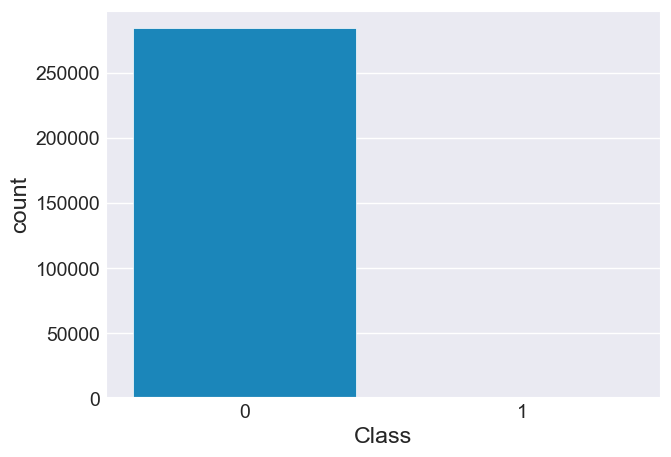

In [10]:
#train["Class"].value_counts()
sns.countplot(x="Class", data=train)



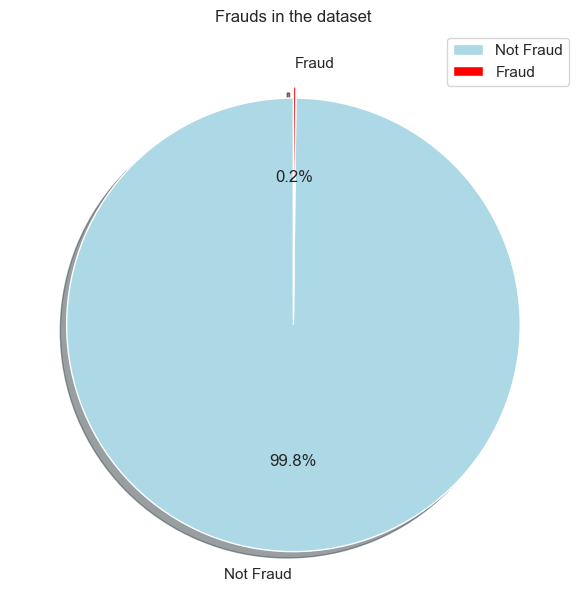

In [11]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = train['Class'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

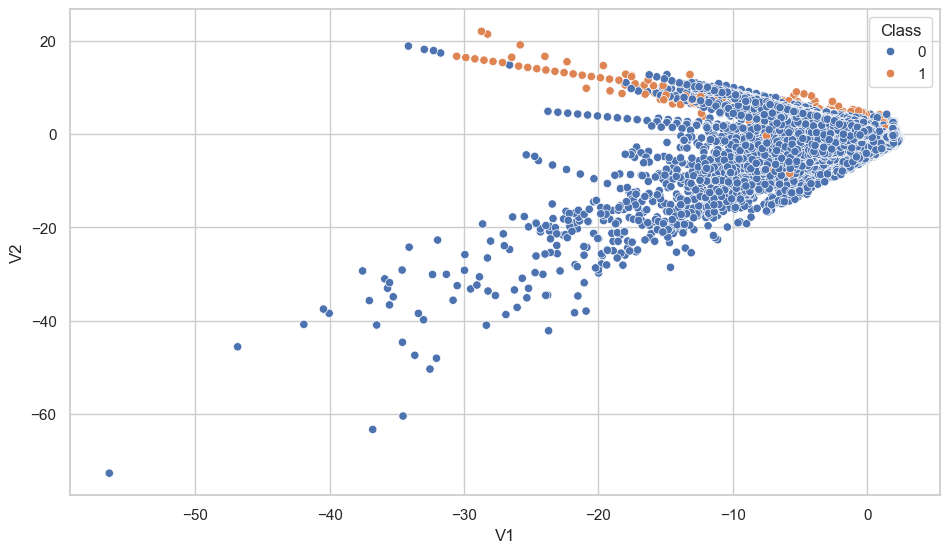

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="V1", y="V2", hue="Class", data=train);

<Figure size 1000x600 with 0 Axes>

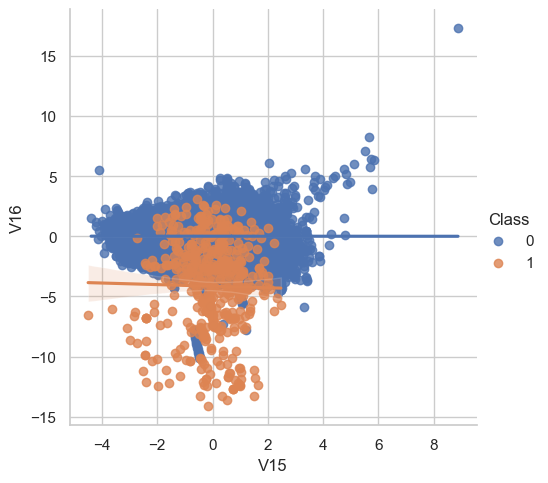

In [13]:
plt.figure(figsize=(10, 6))
sns.lmplot(x="V15", y="V16", hue='Class', data=train, fit_reg=True);

In [14]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
train.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

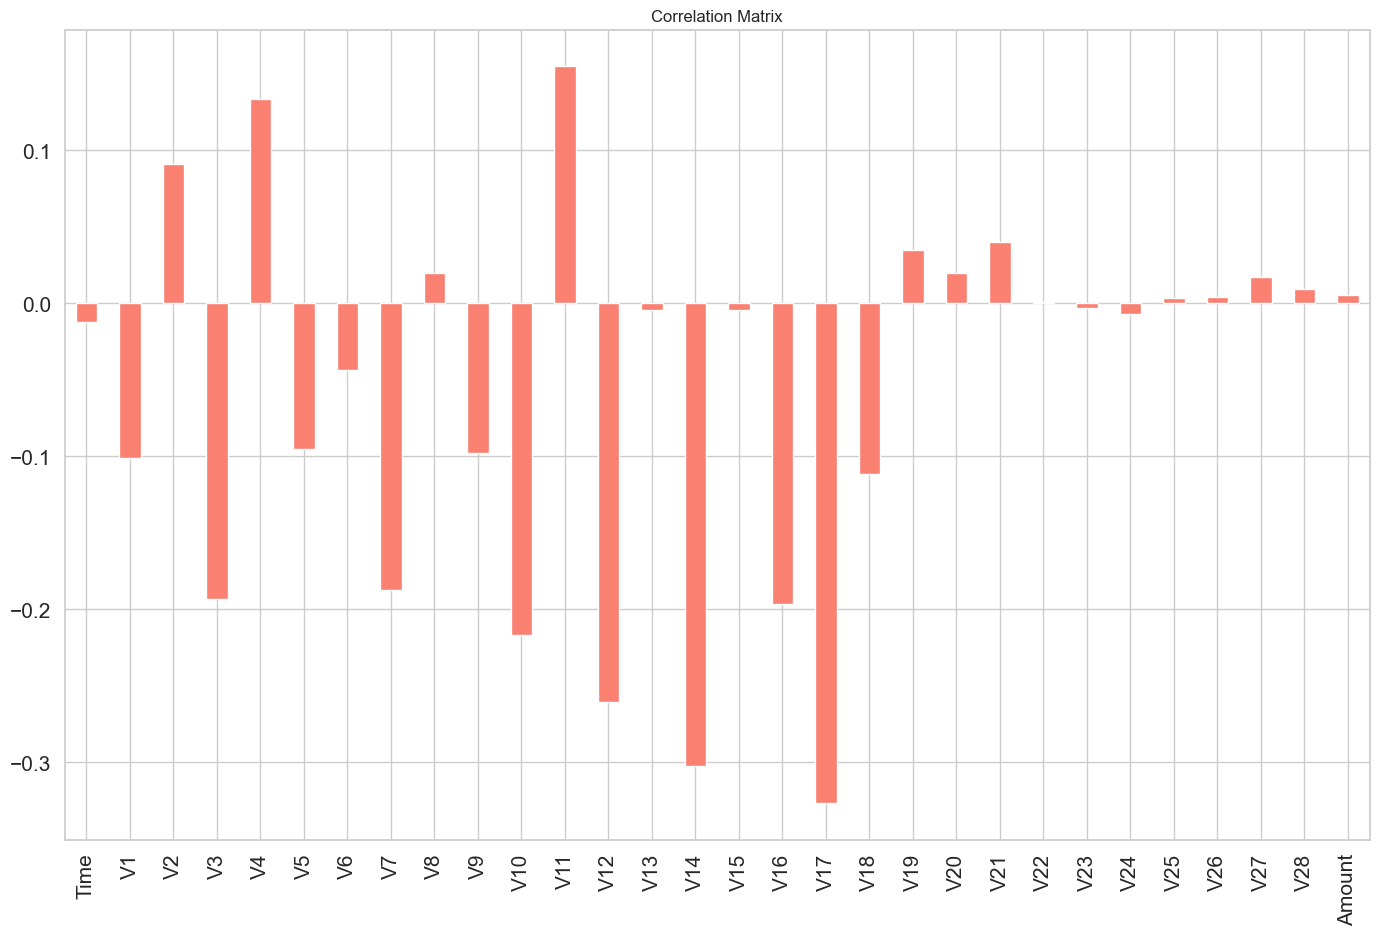

In [16]:


a = train.drop('Class', axis=1)
a.corrwith(train['Class']).plot(kind='bar', figsize=(15,10), color=['salmon'])
plt.title("Correlation Matrix")
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()



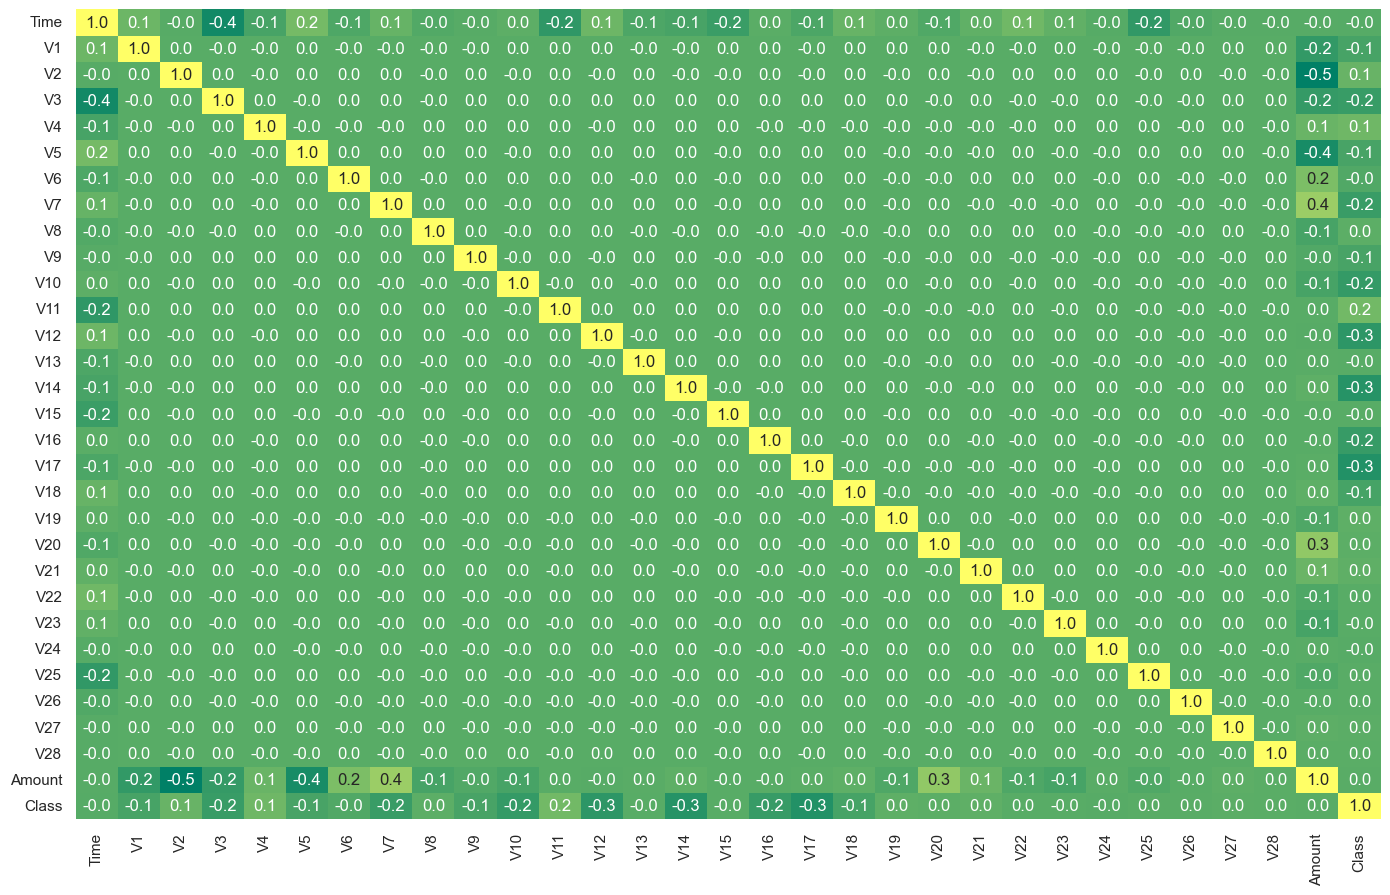

In [17]:


plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, cbar=False, fmt='.1f', cmap='summer')
plt.show()



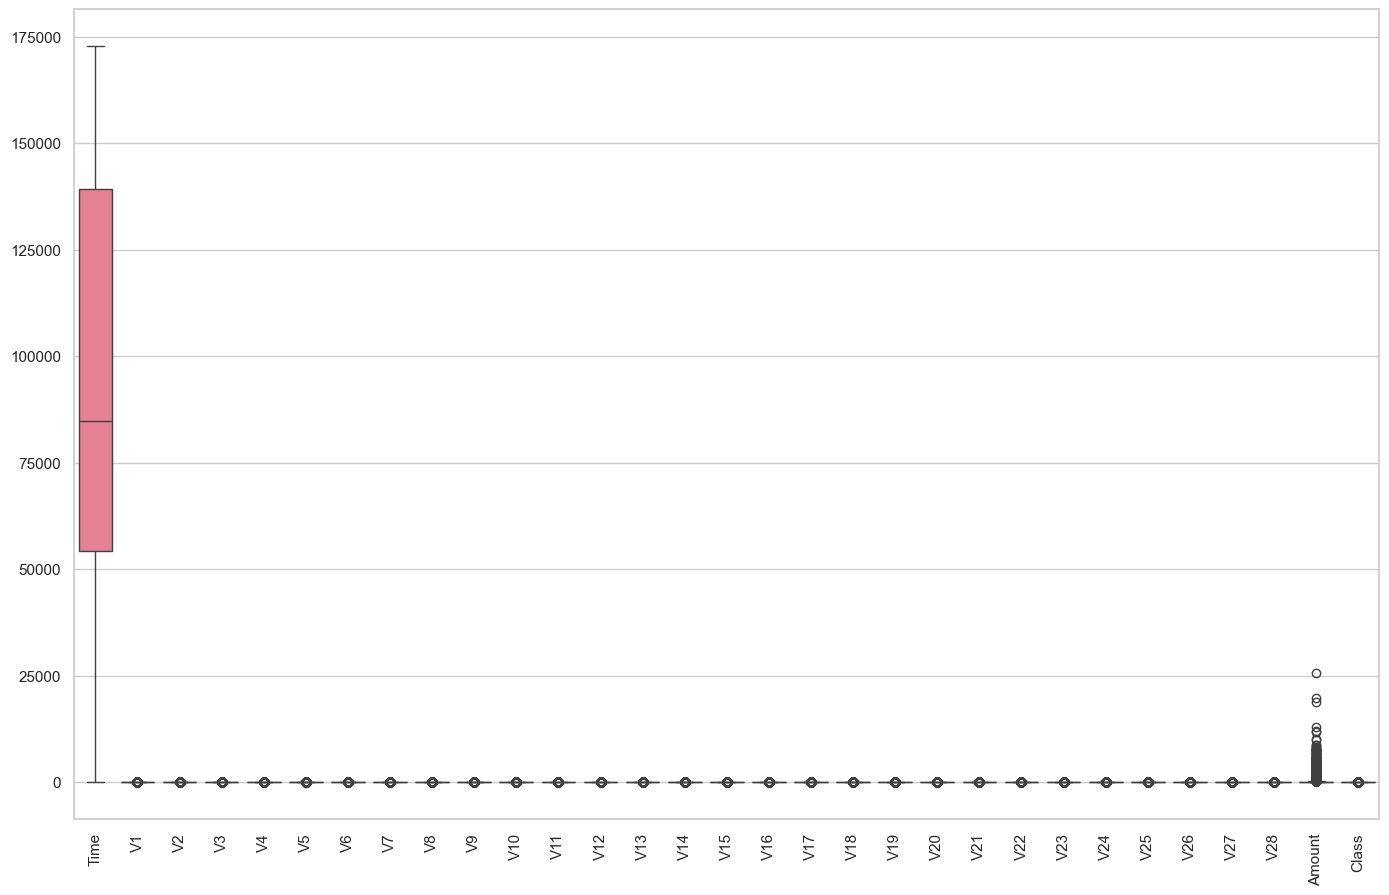

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.show()

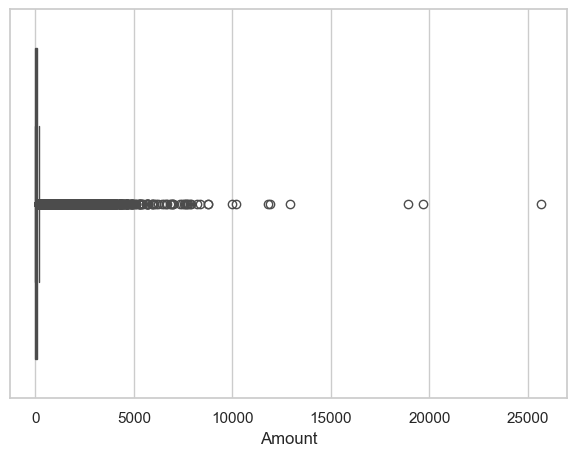

In [19]:
plt.tight_layout()
sns.boxplot(x=train['Amount'], data=train)
plt.show()

In [20]:
display(train.skew())

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

Text(0.5, 1.0, 'Skew:16.977724453761024')

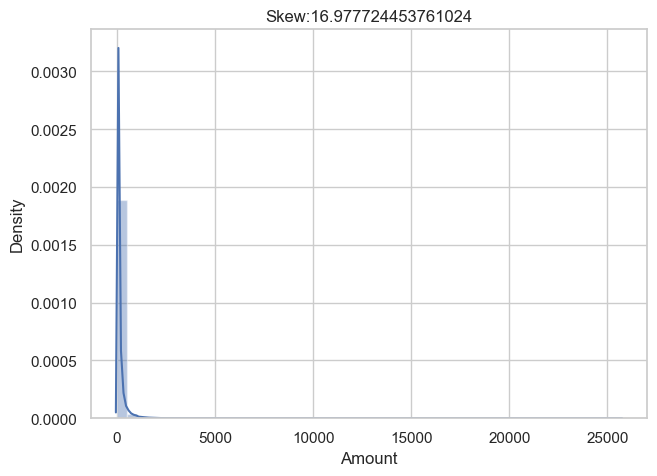

In [21]:
sns.distplot(train['Amount'])
skew_Class = train['Amount'].skew()
plt.title('Skew:'+str(skew_Class))

Text(0.5, 1.0, 'skew:11.19209119221281')

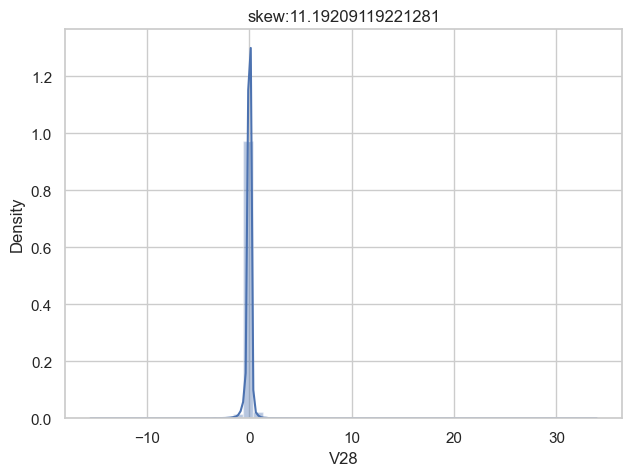

In [22]:
sns.distplot(train['V28'])
skew_V28 = train['V28'].skew()
plt.title('skew:'+str(skew_V28))

In [23]:


sc = StandardScaler()

# normalise the amount column
train['normAmount'] = sc.fit_transform(np.array(train['Amount']).reshape(-1, 1))
  
# drop Time and Amount columns as they are not relevant for prediction purpose 
train = train.drop(['Time', 'Amount'], axis = 1)



In [24]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [25]:


# Independant variable
X = train.drop('Class', axis=1)

# Dependant variable
y = train['Class']



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [30]:
# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())


LogisticRegression()

In [31]:
predictions = lr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('accuracy of base model :', accuracy)
print("\nBase Model: Train Score {:.2f} & Test Score {:.2f} \n".format(lr.score(X_train, y_train), lr.score(X_test, y_test)))

# print confusion matrix
print('Confusion Matrix :\n\n', confusion_matrix(y_test, predictions))
  
# print classification report
print('\n\nClassification Report :\n', classification_report(y_test, predictions))

accuracy of base model : 0.9992158515033414

Base Model: Train Score 1.00 & Test Score 1.00 

Confusion Matrix :

 [[85284    12]
 [   55    92]]


Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.63      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 



In [36]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your features and labels
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [37]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [38]:


lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)



In [39]:


accuracy = accuracy_score(y_test, predictions)
print('accuracy of base model :', accuracy)
print("\nBase Model: Train Score {:.2f} & Test Score {:.2f} \n".format(lr.score(X_train_res, y_train_res), lr.score(X_test, y_test)))

# print confusion matrix
print('Confusion Matrix :\n\n', confusion_matrix(y_test, predictions))

# print classification report
print(classification_report(y_test, predictions))



accuracy of base model : 0.9751881371206536

Base Model: Train Score 0.82 & Test Score 1.00 

Confusion Matrix :

 [[83188  2108]
 [   12   135]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [40]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, predictions)
print(matrix)

# Create pandas dataframe
df = pd.DataFrame(matrix, index=class_names, columns=class_names)

[[83188  2108]
 [   12   135]]


In [41]:
y_pred_logit_proba = lr1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = roc_curve(y_test,  y_pred_logit_proba)
auc_logit = roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9840491040723174


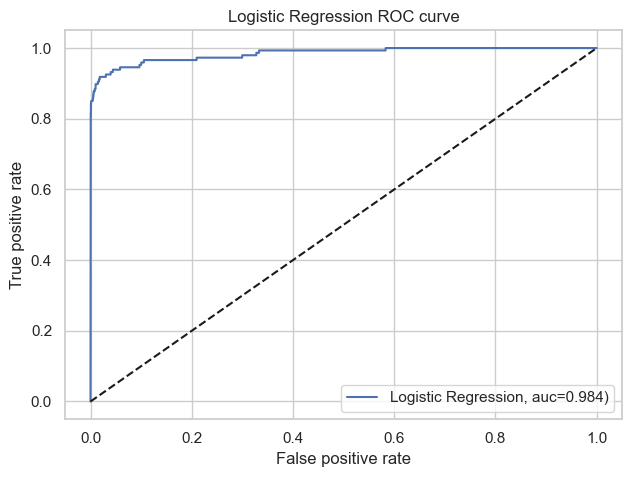

In [42]:


# ROC Curve
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()



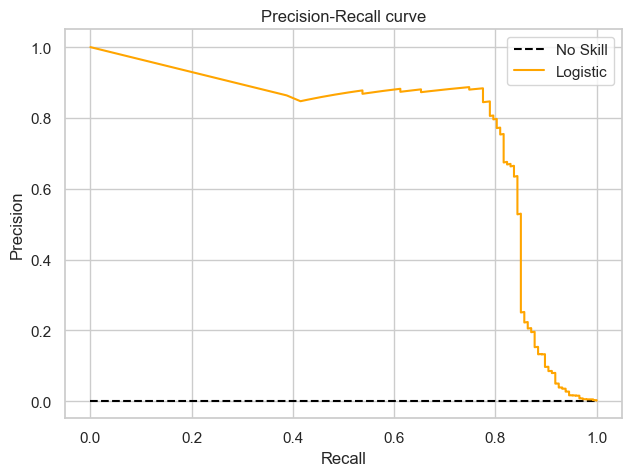

In [43]:
logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_logit_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [45]:


print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
from imblearn.under_sampling import NearMiss

# Assuming X_train and y_train are your features and labels
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))



Before Undersampling, counts of label '1': 345
Before Undersampling, counts of label '0': 199019 

After Undersampling, the shape of train_X: (690, 29)
After Undersampling, the shape of train_y: (690,) 

After Undersampling, the shape of train_X: (690, 29)
After Undersampling, the shape of train_y: (690,) 

After Undersampling, counts of label '1': 345
After Undersampling, counts of label '0': 345


In [46]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

In [47]:


accuracy = accuracy_score(y_test, predictions)
print('accuracy of base model :', accuracy)
print("\nBase Model: Train Score {:.2f} & Test Score {:.2f} \n".format(lr.score(X_train_res, y_train_res), lr.score(X_test, y_test)))

# print confusion matrix
print('Confusion Matrix :\n\n', confusion_matrix(y_test, predictions))

# print classification report
print(classification_report(y_test, predictions))



accuracy of base model : 0.5567688400454104

Base Model: Train Score 0.82 & Test Score 1.00 

Confusion Matrix :

 [[47432 37864]
 [    7   140]]
              precision    recall  f1-score   support

           0       1.00      0.56      0.71     85296
           1       0.00      0.95      0.01       147

    accuracy                           0.56     85443
   macro avg       0.50      0.75      0.36     85443
weighted avg       1.00      0.56      0.71     85443



# PyCaret

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Importing module and initializing setup
from pycaret.classification import *

In [2]:
df = pd.read_csv('data/01_credit_card/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Data Preprocessing
clf1 = setup(data = df, target = 'Class')


,Description,Value
0,Session id,8585
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Comparing models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9996,0.9840,0.8026,0.9430,0.8655,0.8652,0.8689,5.8180
rf,Random Forest Classifier,0.9995,0.9519,0.7734,0.9302,0.8435,0.8433,0.8474,12.3800
et,Extra Trees Classifier,0.9995,0.9549,0.7793,0.9523,0.8551,0.8548,0.8602,1.1010
lda,Linear Discriminant Analysis,0.9994,0.9822,0.7413,0.8659,0.7966,0.7962,0.7998,0.0860
xgboost,Extreme Gradient Boosting,0.9993,0.8978,0.6798,0.7974,0.7306,0.7303,0.7343,0.2810
lr,Logistic Regression,0.9992,0.9560,0.6516,0.8811,0.7468,0.7465,0.7561,1.5560
ada,Ada Boost Classifier,0.9992,0.9797,0.7244,0.8184,0.7672,0.7669,0.7689,4.1650
gbc,Gradient Boosting Classifier,0.9992,0.7994,0.6334,0.8348,0.7046,0.7042,0.7177,21.5450
dt,Decision Tree Classifier,0.9991,0.8823,0.7651,0.7175,0.7377,0.7372,0.7390,1.2150
ridge,Ridge Classifier,0.9989,0.9822,0.4444,0.8568,0.5804,0.5799,0.6137,0.1020


In [ ]:
#tuned_rf = tune_model(rf)
#plot_model(estimator = tuned_rf, plot = 'auc')
#plot_model(estimator = tuned_rf, plot = 'confusion_matrix')
#plot_model(estimator=tuned_rf, plot='feature')
#evaluate_model(tuned_rf)

In [7]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,0.9406,0.7143,0.8929,0.7937,0.7933,0.7983
1,0.9997,0.9702,0.8571,0.9677,0.9091,0.9089,0.9106
2,0.9992,0.9120,0.6571,0.8519,0.7419,0.7415,0.7478
3,0.9995,0.9699,0.8000,0.9032,0.8485,0.8482,0.8498
4,0.9996,0.9093,0.7647,1.0000,0.8667,0.8665,0.8743
5,0.9996,0.9694,0.8529,0.9355,0.8923,0.8921,0.8931
6,0.9994,0.9544,0.7059,0.9231,0.8000,0.7997,0.8069
7,0.9995,0.9849,0.7941,0.9000,0.8438,0.8435,0.8452
8,0.9995,0.9390,0.7353,0.9615,0.8333,0.8331,0.8406


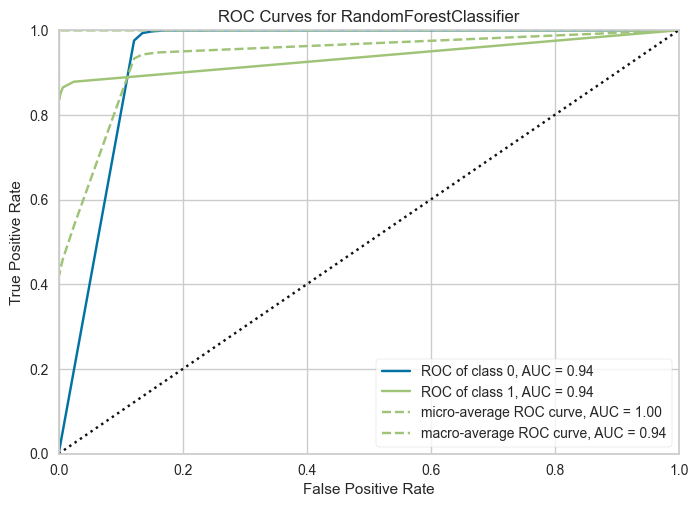

In [8]:
plot_model(estimator = rf, plot = 'auc')

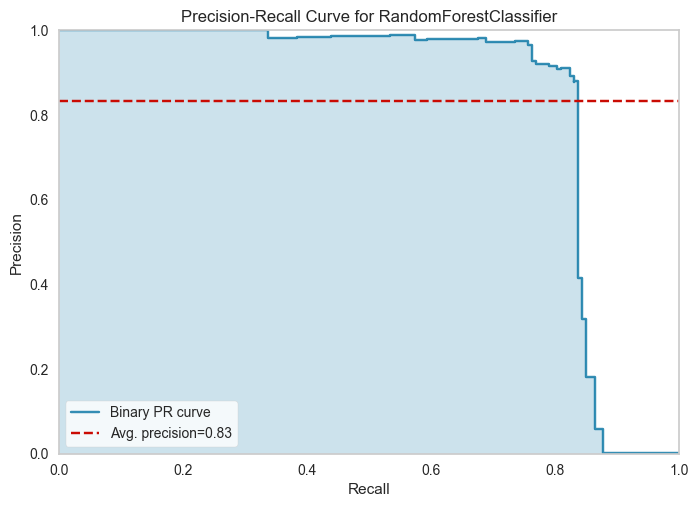

In [9]:
plot_model(estimator = rf, plot = 'pr')

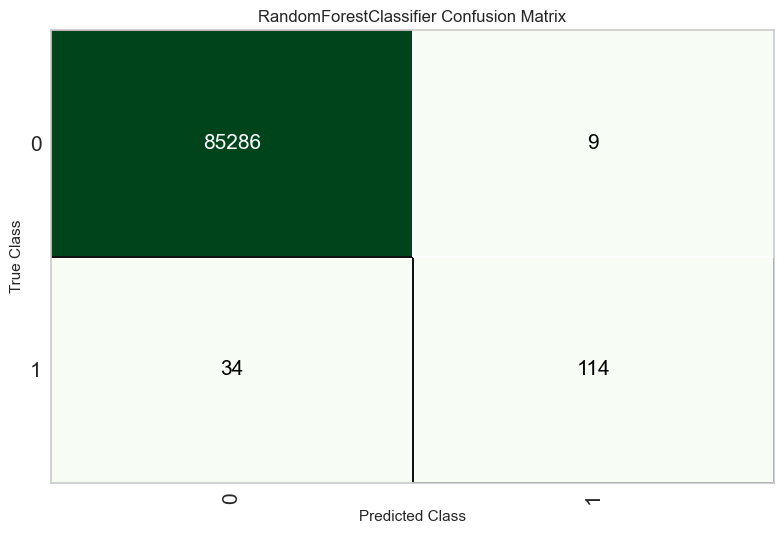

In [10]:

plot_model(estimator = rf, plot = 'confusion_matrix')

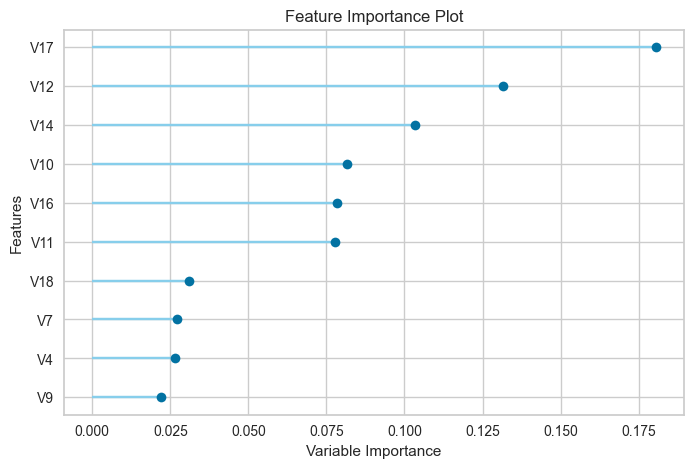

In [11]:

plot_model(estimator=rf, plot='feature')

In [12]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9995,0.9374,0.7703,0.9268,0.8413,0.8411,0.8447


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
167406,118665.0,2.122584,0.174004,-2.491241,0.316353,0.948593,-1.204552,0.892267,-0.474556,-0.354612,...,-0.232494,-0.369831,0.683276,0.734315,-0.125986,-0.108607,1.000000,0,0,1.0
89367,62547.0,1.077048,-0.788803,-1.497545,-0.254805,1.618864,3.604281,-0.772197,0.857014,-0.759564,...,-0.070097,0.843389,0.516922,-0.523615,0.054165,0.076513,150.369995,0,0,1.0
171565,120700.0,1.983128,-0.862707,-1.048141,-0.594428,-0.908542,-0.745332,-0.920332,-0.027642,-0.223551,...,0.063348,-0.074795,-0.221666,-0.113211,0.019666,-0.012170,69.000000,0,0,1.0
22963,32522.0,0.775001,-2.212050,0.419531,-1.111737,-2.195056,-0.615083,-0.785783,-0.074518,-1.897139,...,-0.100897,0.466658,-0.088399,-0.473354,-0.032650,0.079745,359.519989,0,0,1.0
235689,148499.0,1.905371,-0.119678,-2.172044,0.458940,0.440489,-1.073963,0.406071,-0.377622,0.622582,...,-0.208427,-0.782328,0.315703,-0.068121,-0.021905,-0.018020,109.099998,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136578,81772.0,1.045358,-0.288689,0.925938,1.286575,-0.661119,0.486296,-0.633351,0.275363,0.883722,...,-0.160655,-0.432946,0.446058,-0.184565,0.066538,0.035508,63.750000,0,0,1.0
260354,159519.0,0.129592,0.855998,-0.634866,-0.767178,1.132550,-0.253426,0.746641,0.151647,-0.058222,...,0.032229,-0.050211,-0.425491,0.133036,0.208694,0.065996,1.290000,0,0,1.0
237674,149344.0,-1.330647,-0.208895,1.023430,-0.895808,0.980642,0.152678,0.987195,0.080145,-0.254587,...,-0.149362,-1.107106,1.054177,-0.494298,-0.017203,0.064033,171.000000,0,0,1.0
59772,48997.0,-1.031756,0.743037,1.581481,0.044593,0.748108,-0.408515,1.202527,-0.363730,-0.399276,...,-0.049443,0.101729,0.129339,-0.502095,-0.288370,-0.058705,35.000000,0,0,1.0


In [14]:
final_rf = finalize_model(rf)
final_rf

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Time', 'V1', 'V2', 'V3', 'V4',
                                             'V5', 'V6', 'V7', 'V8', 'V9',
                                             'V10', 'V11', 'V12', 'V13', 'V14',
                                             'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24',
                                             'V25', 'V26', 'V27', 'V28',
                                             'Amount'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=8585, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [15]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
167406,118665.0,2.122584,0.174004,-2.491241,0.316353,0.948593,-1.204552,0.892267,-0.474556,-0.354612,...,-0.232494,-0.369831,0.683276,0.734315,-0.125986,-0.108607,1.000000,0,0,1.0
89367,62547.0,1.077048,-0.788803,-1.497545,-0.254805,1.618864,3.604281,-0.772197,0.857014,-0.759564,...,-0.070097,0.843389,0.516922,-0.523615,0.054165,0.076513,150.369995,0,0,1.0
171565,120700.0,1.983128,-0.862707,-1.048141,-0.594428,-0.908542,-0.745332,-0.920332,-0.027642,-0.223551,...,0.063348,-0.074795,-0.221666,-0.113211,0.019666,-0.012170,69.000000,0,0,1.0
22963,32522.0,0.775001,-2.212050,0.419531,-1.111737,-2.195056,-0.615083,-0.785783,-0.074518,-1.897139,...,-0.100897,0.466658,-0.088399,-0.473354,-0.032650,0.079745,359.519989,0,0,1.0
235689,148499.0,1.905371,-0.119678,-2.172044,0.458940,0.440489,-1.073963,0.406071,-0.377622,0.622582,...,-0.208427,-0.782328,0.315703,-0.068121,-0.021905,-0.018020,109.099998,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136578,81772.0,1.045358,-0.288689,0.925938,1.286575,-0.661119,0.486296,-0.633351,0.275363,0.883722,...,-0.160655,-0.432946,0.446058,-0.184565,0.066538,0.035508,63.750000,0,0,1.0
260354,159519.0,0.129592,0.855998,-0.634866,-0.767178,1.132550,-0.253426,0.746641,0.151647,-0.058222,...,0.032229,-0.050211,-0.425491,0.133036,0.208694,0.065996,1.290000,0,0,1.0
237674,149344.0,-1.330647,-0.208895,1.023430,-0.895808,0.980642,0.152678,0.987195,0.080145,-0.254587,...,-0.149362,-1.107106,1.054177,-0.494298,-0.017203,0.064033,171.000000,0,0,1.0
59772,48997.0,-1.031756,0.743037,1.581481,0.044593,0.748108,-0.408515,1.202527,-0.363730,-0.399276,...,-0.049443,0.101729,0.129339,-0.502095,-0.288370,-0.058705,35.000000,0,0,1.0
